<a href="https://colab.research.google.com/github/apchavezr/18.-Modelado-y-simulaci-n/blob/main/simulacion_salud_eventos_discretos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulación de un Centro de Salud con un Médico
Este notebook implementa una simulación por eventos discretos utilizando `simpy`. Se analiza el comportamiento de un centro de atención donde los pacientes llegan de forma aleatoria y son atendidos por un único médico.

In [2]:
!pip install simpy

In [4]:
import simpy
import random
import statistics
import matplotlib.pyplot as plt

# Parámetros
TIEMPO_SIMULACION = 480
INTERVALO_LLEGADAS = (5, 10)
TIEMPO_ATENCION = (6, 12)
N_REPLICAS = 30

# Resultados
tiempos_espera_promedio = []
utilizacion_medico = []
pacientes_no_atendidos = []
pacientes_atendidos = []
detalles_espera = []
detalles_utilizacion = []

def paciente(env, nombre, medico, stats):
    llegada = env.now
    with medico.request() as req:
        resultado = yield req | env.timeout(TIEMPO_SIMULACION - env.now)
        espera = env.now - llegada
        if req in resultado:
            stats['tiempos_espera'].append(espera)
            duracion = random.uniform(*TIEMPO_ATENCION)
            stats['tiempo_ocupado'] += duracion
            yield env.timeout(duracion)
        else:
            stats['no_atendidos'] += 1

def generador_pacientes(env, medico, stats):
    i = 0
    while True:
        yield env.timeout(random.uniform(*INTERVALO_LLEGADAS))
        i += 1
        env.process(paciente(env, f"Paciente {i}", medico, stats))

def ejecutar_simulacion():
    env = simpy.Environment()
    medico = simpy.Resource(env, capacity=1)
    stats = {'tiempos_espera': [], 'tiempo_ocupado': 0, 'no_atendidos': 0}
    env.process(generador_pacientes(env, medico, stats))
    env.run(until=TIEMPO_SIMULACION)

    promedio_espera = statistics.mean(stats['tiempos_espera']) if stats['tiempos_espera'] else 0
    utilizacion = stats['tiempo_ocupado'] / TIEMPO_SIMULACION

    tiempos_espera_promedio.append(promedio_espera)
    utilizacion_medico.append(utilizacion)
    pacientes_atendidos.append(len(stats['tiempos_espera']))
    pacientes_no_atendidos.append(stats['no_atendidos'])
    detalles_espera.append(promedio_espera)
    detalles_utilizacion.append(utilizacion * 100)
    print(f"Tiempo promedio de espera: {promedio_espera:.2f} minutos")
    print(f"Utilización del médico: {utilizacion * 100:.2f}%")


for _ in range(N_REPLICAS):
    ejecutar_simulacion()


Tiempo promedio de espera: 26.99 minutos
Utilización del médico: 97.95%
Tiempo promedio de espera: 40.87 minutos
Utilización del médico: 99.14%
Tiempo promedio de espera: 32.65 minutos
Utilización del médico: 100.15%
Tiempo promedio de espera: 38.39 minutos
Utilización del médico: 98.64%
Tiempo promedio de espera: 33.33 minutos
Utilización del médico: 99.20%
Tiempo promedio de espera: 31.37 minutos
Utilización del médico: 99.06%
Tiempo promedio de espera: 44.41 minutos
Utilización del médico: 98.88%
Tiempo promedio de espera: 36.12 minutos
Utilización del médico: 99.24%
Tiempo promedio de espera: 35.41 minutos
Utilización del médico: 99.82%
Tiempo promedio de espera: 22.13 minutos
Utilización del médico: 99.87%
Tiempo promedio de espera: 44.64 minutos
Utilización del médico: 98.34%
Tiempo promedio de espera: 33.31 minutos
Utilización del médico: 100.00%
Tiempo promedio de espera: 34.46 minutos
Utilización del médico: 99.97%
Tiempo promedio de espera: 30.55 minutos
Utilización del médic

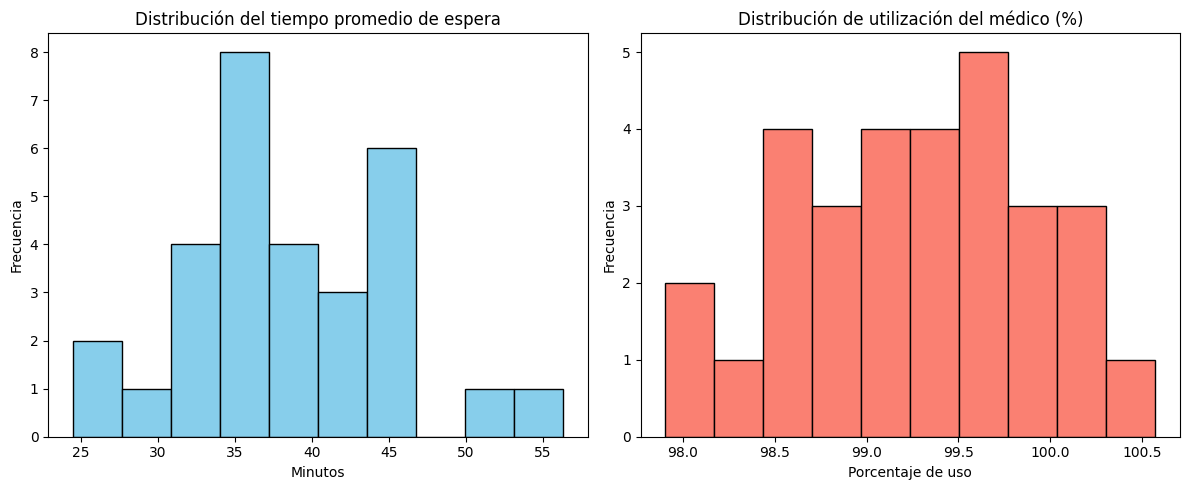

In [ ]:
# Visualización
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].hist(detalles_espera, bins=10, color='skyblue', edgecolor='black')
axs[0].set_title('Distribución del tiempo promedio de espera')
axs[0].set_xlabel('Minutos')
axs[0].set_ylabel('Frecuencia')

axs[1].hist(detalles_utilizacion, bins=10, color='salmon', edgecolor='black')
axs[1].set_title('Distribución de utilización del médico (%)')
axs[1].set_xlabel('Porcentaje de uso')
axs[1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

Las gráficas muestran los resultados de 30 réplicas de una simulación de atención en un centro de salud con un solo médico:

* Distribución del tiempo promedio de espera (izquierda): la mayoría de los tiempos promedio se encuentran entre 30 y 45 minutos, con algunos valores extremos llegando hasta los 55 minutos. Esto sugiere una alta variabilidad en los tiempos de espera, posiblemente influenciada por picos de demanda o secuencias de llegadas muy cortas.

* Distribución de utilización del médico (derecha): el uso del recurso médico es muy alto, oscilando entre el 98 % y el 100 % en la mayoría de las réplicas. Esta alta utilización indica que el médico está constantemente ocupado, lo cual puede explicar los tiempos de espera elevados y sugiere que el sistema opera al límite de su capacidad.
